# Importing libraries

In [541]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

# Loading .xls

In [542]:
who = pd.read_csv('Life_Expectancy_Data.xls')

In [543]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Checking size of data frame (columns + rows)

In [544]:
len(who.columns)

22

In [545]:
len(who.index)

2938

# Checking for data types

In [546]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking amount of NaN's

In [547]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.00
1,Year,0.00
2,Status,0.00
3,Life expectancy,0.34
4,Adult Mortality,0.34
5,infant deaths,0.00
6,Alcohol,6.60
7,percentage expenditure,0.00
8,Hepatitis B,18.82
9,Measles,0.00


# Replacing NaN with median

In [548]:
who.fillna(who.median(), inplace=True)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_14283/2090037703.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.fillna(who.median(), inplace=True)


In [549]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.0
1,Year,0.0
2,Status,0.0
3,Life expectancy,0.0
4,Adult Mortality,0.0
5,infant deaths,0.0
6,Alcohol,0.0
7,percentage expenditure,0.0
8,Hepatitis B,0.0
9,Measles,0.0


# Dropping duplicates

In [550]:
who.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Checking for column uniform names

In [551]:
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Standardizing column names

In [552]:
who.rename(columns={'Life expectancy ' : 'life expectancy'}, inplace=True)

In [553]:
who.rename(columns={'Measles '  : 'measles'}, inplace=True)

In [554]:
who.rename(columns={' BMI ' : 'bmi'}, inplace=True)

In [555]:
who.rename(columns={'under-five deaths ' : 'under-five deaths'}, inplace=True)

In [556]:
who.rename(columns={'Diphtheria ' : 'diphtheria'}, inplace=True)

In [557]:
who.rename(columns={' HIV/AIDS' : 'hiv/aids'}, inplace=True)

In [558]:
who.rename(columns={' thinness  1-19 years' : 'thinness 1-19 years'}, inplace=True)

In [559]:
who.rename(columns={' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True)

In [560]:
who.columns= who.columns.str.lower()

In [561]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Standardizing country names

In [562]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [563]:
who.replace('Brunei Darussalam', 'Brunei', inplace=True)

In [564]:
who.replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)

In [565]:
who.replace('Cabo Verde', 'Cape Verde', inplace=True)

In [566]:
who.replace("Democratic People's Republic of Korea", "North Korea", inplace=True)

In [567]:
who.replace("Democratic Republic of the Congo", "Congo", inplace=True)

In [568]:
who.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

In [569]:
who.replace("Lao People's Democratic Republic", "Laos", inplace=True)

In [570]:
who.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)

In [571]:
who.replace("Republic of Korea", "South Republic of Korea", inplace=True)

In [572]:
who.replace("Republic of Moldova", "Moldova", inplace=True)

In [573]:
who.replace("Russian Federation", "Russia", inplace=True)

In [574]:
who.replace("Syrian Arab Republic", "Syria", inplace=True)

In [575]:
who.replace("The former Yugoslav republic of Macedonia", "Macedonia", inplace=True)

In [576]:
who.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom", inplace=True)

In [577]:
who.replace("United Republic of Tanzania", "Tanzania", inplace=True)

In [578]:
who.replace("United States of America", "America", inplace=True)

In [579]:
who.replace("America", "United States", inplace=True)

In [580]:
who.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)

In [581]:
who.replace("Viet Nam", "Vietnam", inplace=True)

In [582]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
  

# Visualizing difference in development

In [587]:
groupby = who.groupby('country', as_index=False)

In [588]:
groupby.first()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010,71.279624,65.0,1154,...,6.0,8.160,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,0,4.600,364.975229,99.0,0,...,99.0,6.000,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21,3.755,0.000000,95.0,63,...,95.0,5.755,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66,3.755,0.000000,64.0,118,...,7.0,5.755,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,3.755,0.000000,99.0,0,...,86.0,5.755,99.0,0.2,13566.954100,1386542.0,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,2015,Developing,74.1,157.0,9,3.755,0.000000,87.0,0,...,87.0,5.755,87.0,0.1,1766.947595,1386542.0,1.6,1.5,0.769,14.3
188,Vietnam,2015,Developing,76.0,127.0,28,3.755,0.000000,97.0,256,...,97.0,5.755,97.0,0.1,1766.947595,1386542.0,14.2,14.5,0.678,12.6
189,Yemen,2015,Developing,65.7,224.0,37,3.755,0.000000,69.0,468,...,63.0,5.755,69.0,0.1,1766.947595,1386542.0,13.6,13.4,0.499,9.0
190,Zambia,2015,Developing,61.8,33.0,27,3.755,0.000000,9.0,9,...,9.0,5.755,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [589]:
development = groupby['status'].value_counts()

In [590]:
development

,country,status,count
0,Afghanistan,Developing,16
1,Albania,Developing,16
2,Algeria,Developing,16
3,Angola,Developing,16
4,Antigua and Barbuda,Developing,16
...,...,...,...
187,Venezuela,Developing,16
188,Vietnam,Developing,16
189,Yemen,Developing,16
190,Zambia,Developing,16


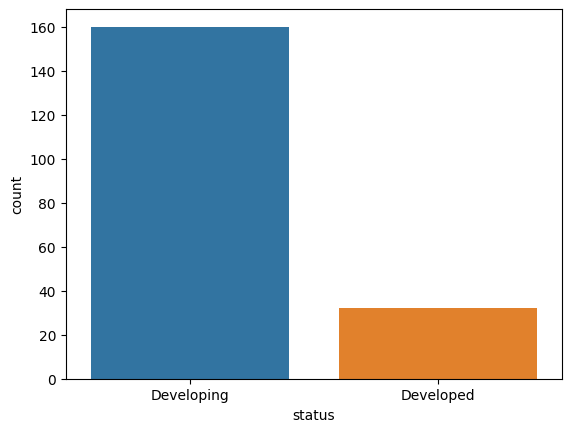

In [593]:
development_graph = sns.countplot(x="status", data=development)

# Groupby averaging countries

In [534]:
# grouping by country as to avoid e.g. 2000-2020 =  20x Brazil, mean deletes status as it is categorical

who = who.groupby('country', as_index=False).mean()

In [305]:
who.columns

Index(['country', 'year', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [306]:
who = who.drop(['year'], axis = 1)

In [307]:
who

,country,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,23.5000,91.7500,4.675937,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,49.01875,328.5625,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,132.6250,46.1250,4.034063,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,0.0000,96.9375,4.851562,98.3125,0.12500,9759.305728,1.386542e+06,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,73.38750,163.0000,9.3750,7.190937,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,5.045937,68.5000,0.10000,1766.947595,1.386542e+06,1.65000,1.56250,0.726812,12.78750
188,Vietnam,74.77500,126.5625,29.1875,3.129062,0.000000,88.3750,4232.9375,11.18750,36.5000,94.9375,5.963438,91.7500,0.14375,1766.947595,1.386542e+06,14.92500,15.62500,0.627062,11.51250
189,Yemen,63.86250,211.8125,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,5.052188,72.6250,0.10000,1766.947595,1.386542e+06,13.83125,13.75000,0.475500,8.50625
190,Zambia,53.90625,354.3125,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,52.3750,64.3750,5.819687,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250


# Pairplot for pairwise feature correlation

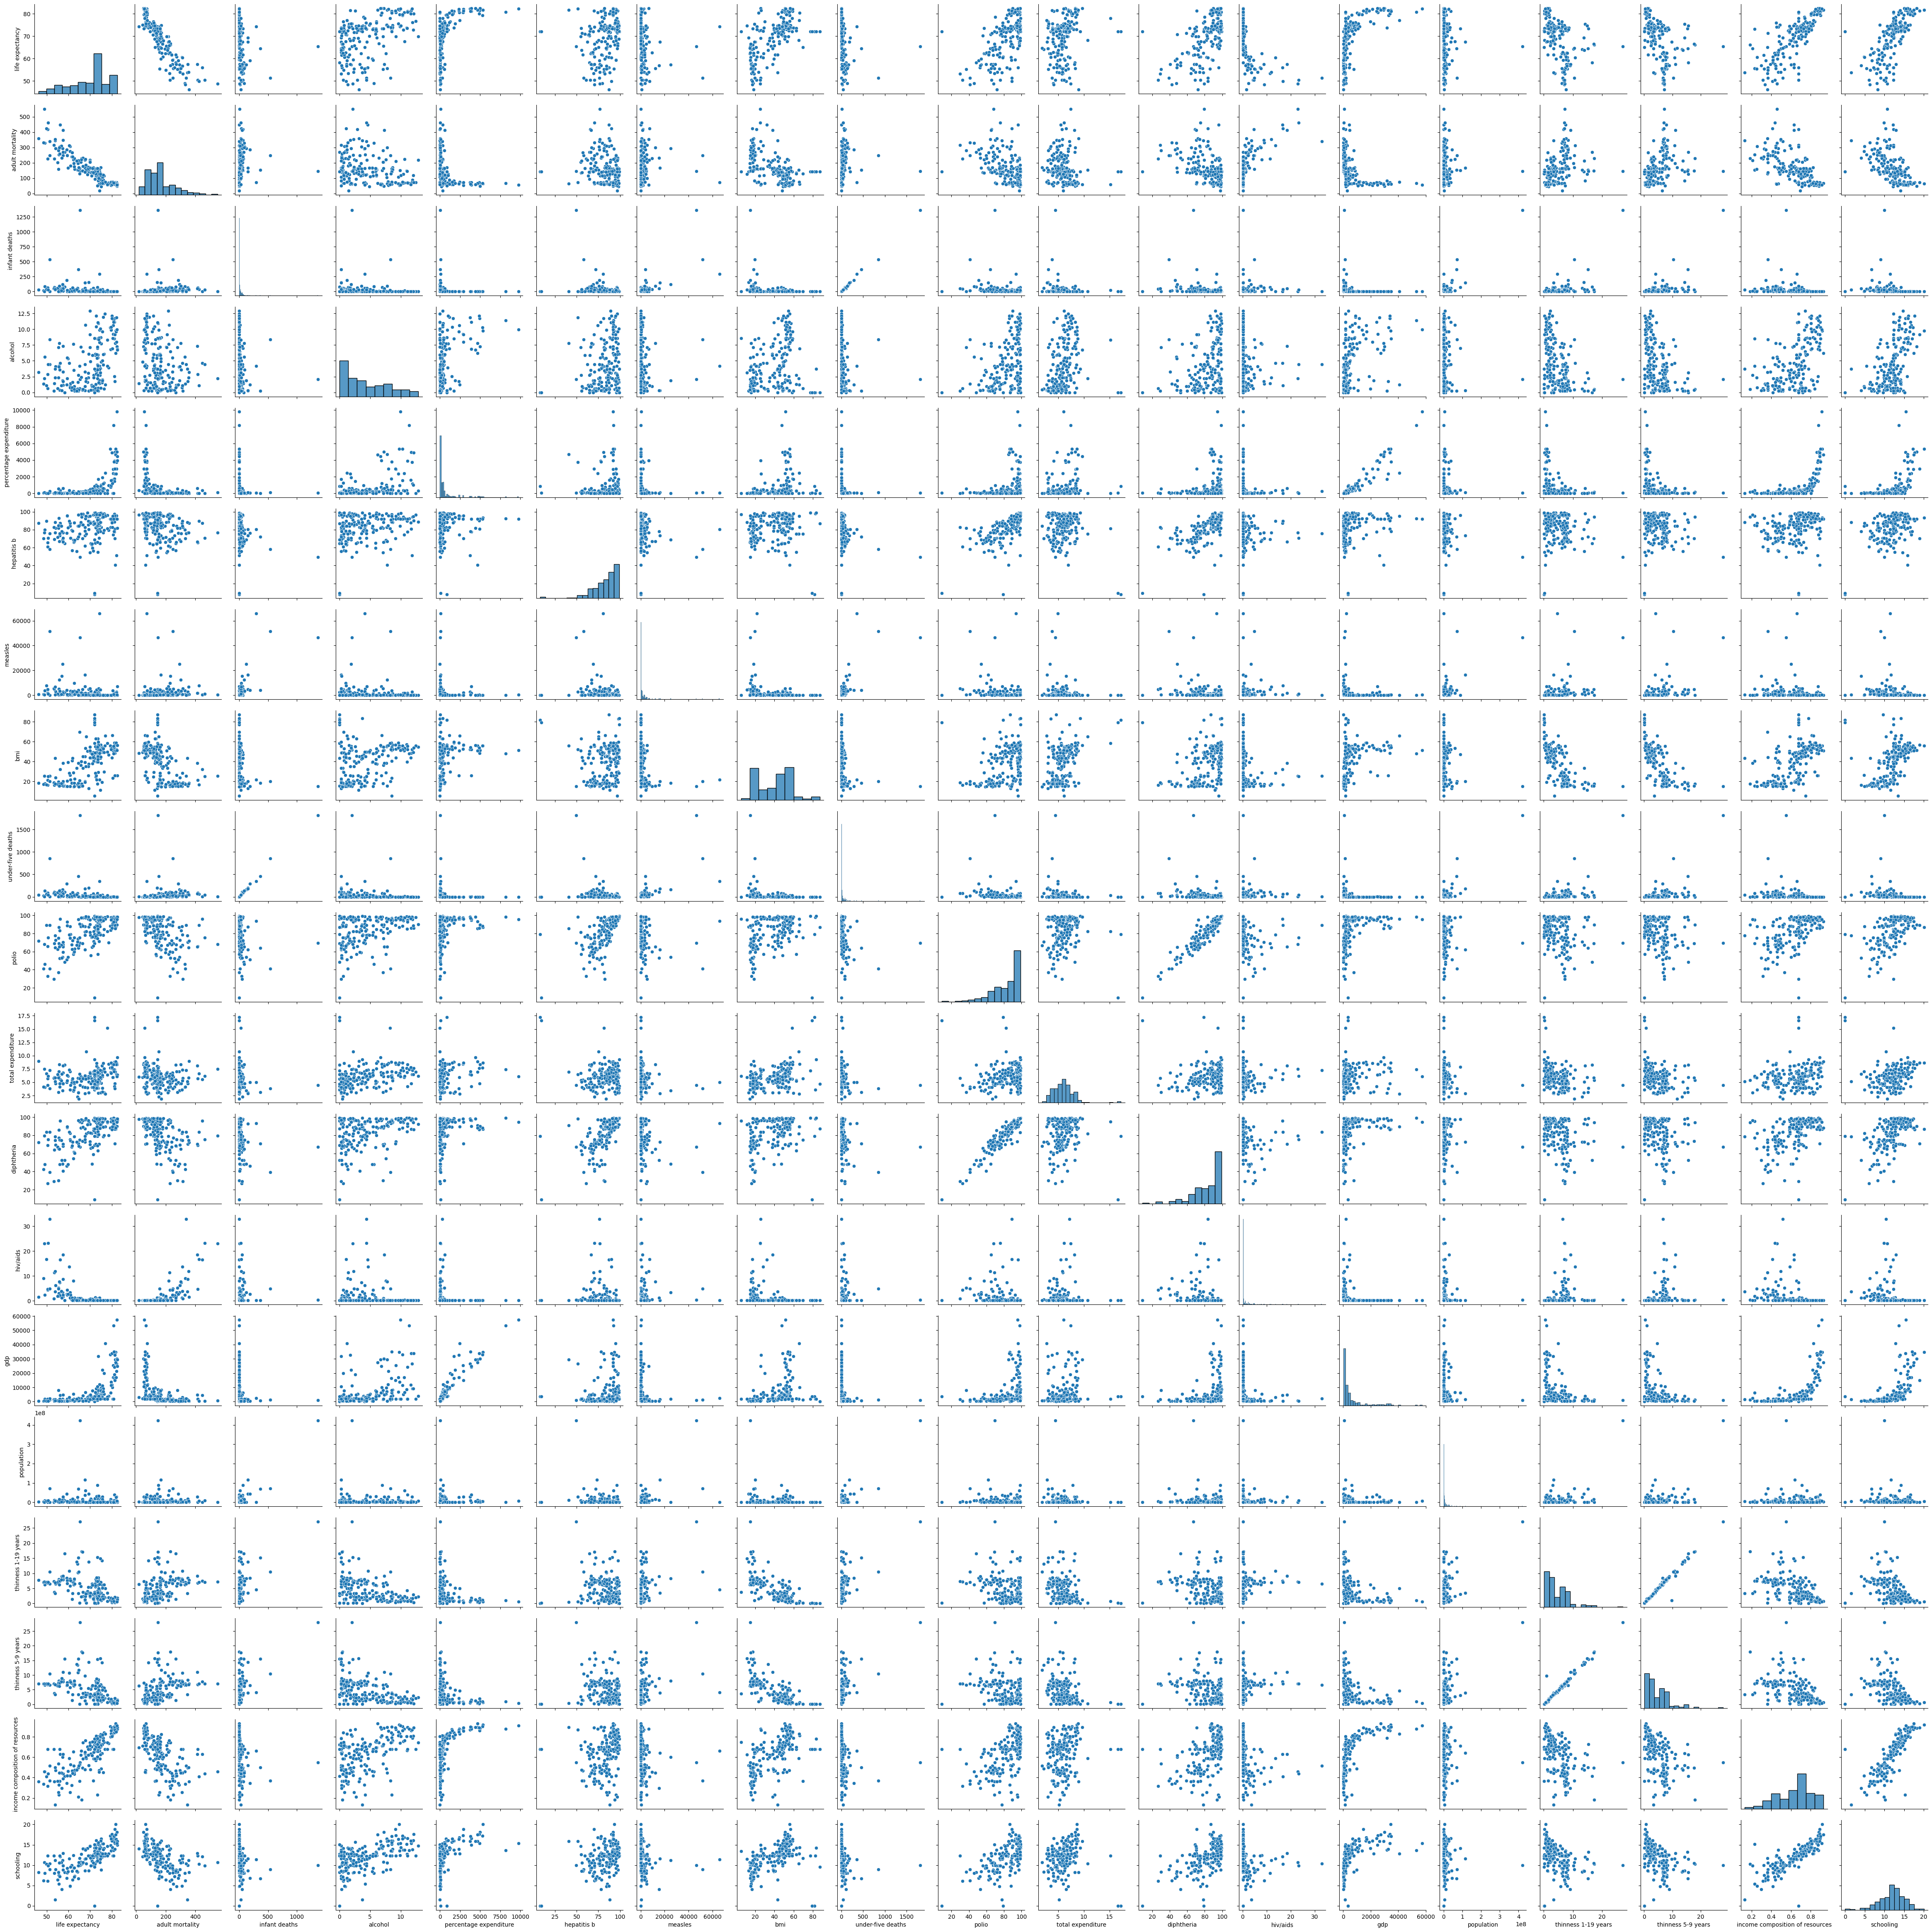

In [310]:
sns.pairplot(who)


# Histograms for distribution of numerical features

array([[<AxesSubplot:title={'center':'life expectancy'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'under-five deaths'}>,
        <AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'diphtheria'}>],
       [<AxesSubplot:title={'center':'hiv/aids'}>,
        <AxesSubplot:title={'center':'gdp'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>],
       [<AxesSubplot:title={'center':'thinness 5-9 years'}>,
        <AxesSubplot:title={'center':'income composition of resou

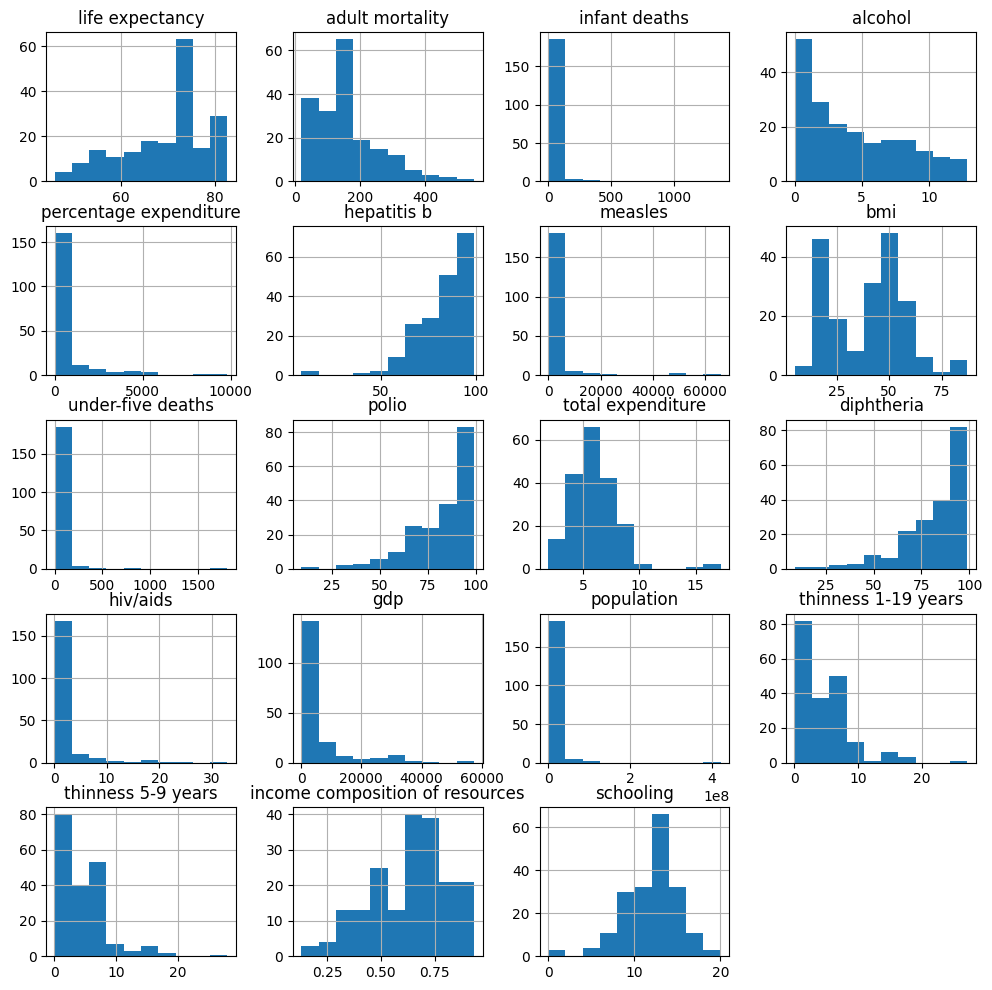

In [311]:
who.hist(figsize=(12,12))

# Checking skewness of dataframe

In [313]:
who.skew(axis = 0, skipna = False)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_14283/1374744912.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.skew(axis = 0, skipna = False)


life expectancy                    -0.663830
adult mortality                     1.233604
infant deaths                       9.600424
alcohol                             0.589698
percentage expenditure              3.300749
hepatitis b                        -1.821565
measles                             6.486769
bmi                                 0.079719
under-five deaths                   9.244603
polio                              -1.365041
total expenditure                   1.862400
diphtheria                         -1.473511
hiv/aids                            4.287512
gdp                                 2.575116
population                         10.163693
thinness 1-19 years                 1.751115
thinness 5-9 years                  1.807789
income composition of resources    -0.539370
schooling                          -0.732971
dtype: float64

# Building correlation heatmap

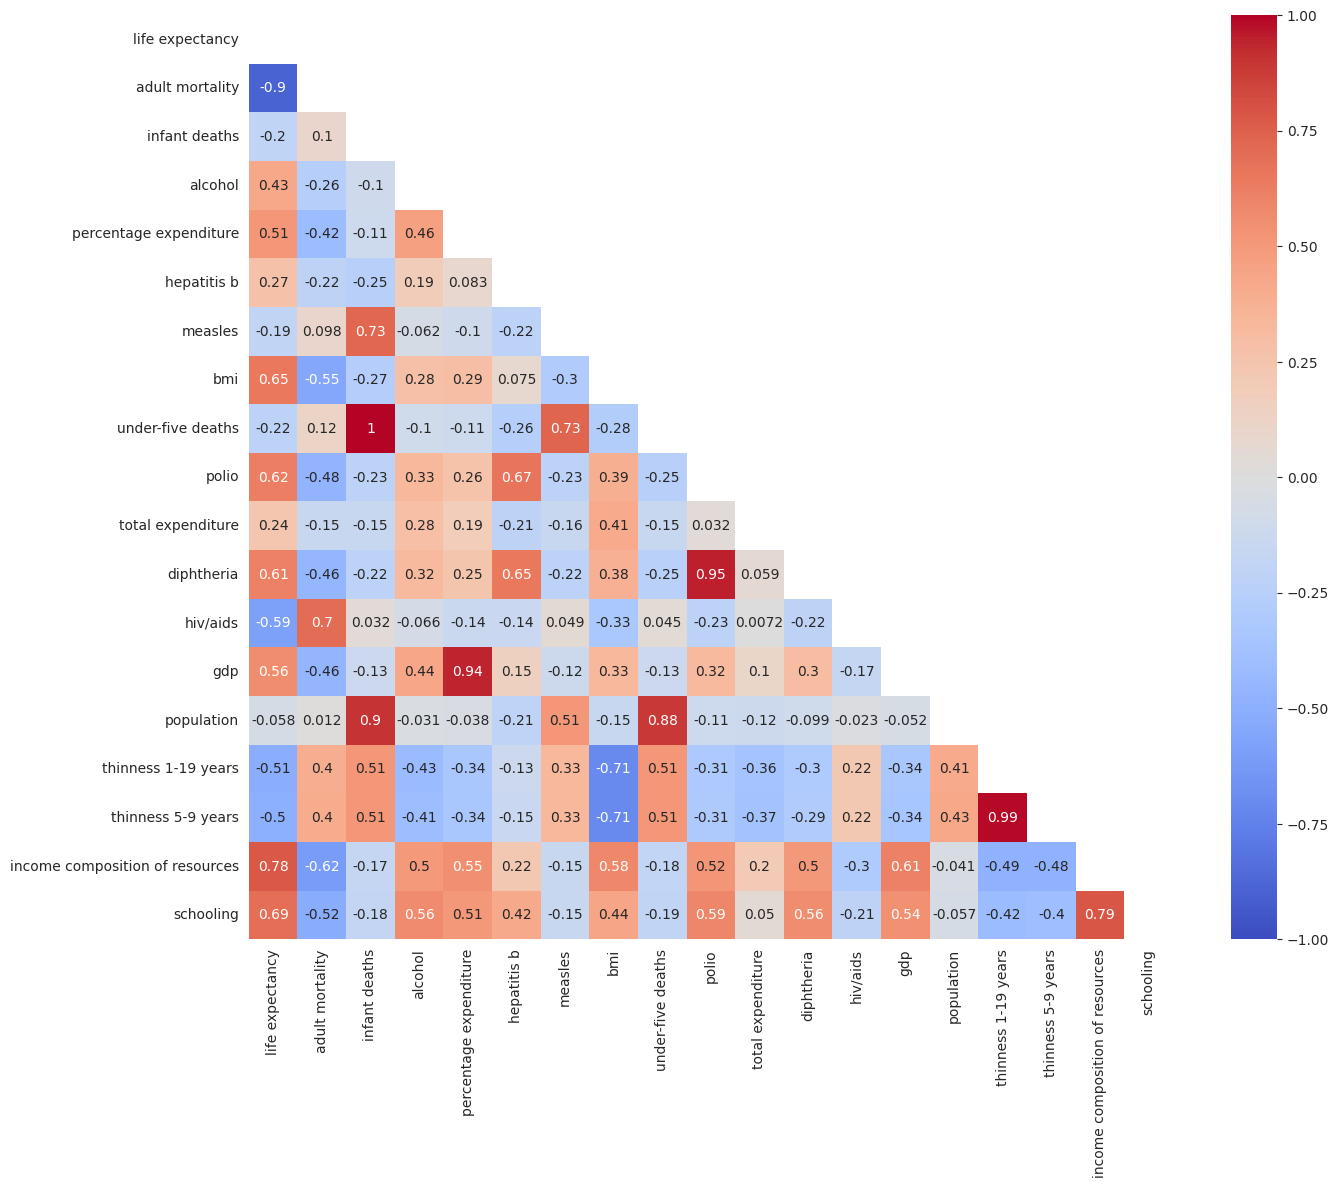

In [314]:
corr = who.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)





# Identifying highly correlated columns

In [315]:
corr_matrix=who.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.80)]



['adult mortality',
 'under-five deaths',
 'diphtheria',
 'gdp',
 'population',
 'thinness 5-9 years']

# Dropping highly correlated columns

In [316]:
who.drop(['adult mortality', 'under-five deaths', 'diphtheria', 'gdp', 'population', 'thinness 5-9 years'],axis=1,inplace=True)

# Dividing categoricals/numericals

In [317]:
who_categoricals = who['country']

In [319]:
type(who_categoricals)

pandas.core.series.Series

In [320]:
who_numericals = who._get_numeric_data()

In [321]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   life expectancy                  192 non-null    float64
 1   infant deaths                    192 non-null    float64
 2   alcohol                          192 non-null    float64
 3   percentage expenditure           192 non-null    float64
 4   hepatitis b                      192 non-null    float64
 5   measles                          192 non-null    float64
 6   bmi                              192 non-null    float64
 7   polio                            192 non-null    float64
 8   total expenditure                192 non-null    float64
 9   hiv/aids                         192 non-null    float64
 10  thinness 1-19 years              192 non-null    float64
 11  income composition of resources  192 non-null    float64
 12  schooling             

# Defining X1, y1 (Linear regression, w/o Hot Coding)

In [322]:
X1 = who_numericals

In [323]:
X1 = X1.drop(['life expectancy'], axis=1)

In [324]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   infant deaths                    192 non-null    float64
 1   alcohol                          192 non-null    float64
 2   percentage expenditure           192 non-null    float64
 3   hepatitis b                      192 non-null    float64
 4   measles                          192 non-null    float64
 5   bmi                              192 non-null    float64
 6   polio                            192 non-null    float64
 7   total expenditure                192 non-null    float64
 8   hiv/aids                         192 non-null    float64
 9   thinness 1-19 years              192 non-null    float64
 10  income composition of resources  192 non-null    float64
 11  schooling                        192 non-null    float64
dtypes: float64(12)
memory 

In [325]:
y1 = who_numericals['life expectancy']

In [327]:
y1

0      58.19375
1      75.15625
2      73.61875
3      49.01875
4      75.05625
         ...   
187    73.38750
188    74.77500
189    63.86250
190    53.90625
191    50.48750
Name: life expectancy, Length: 192, dtype: float64

# Data splitting X1, y1

In [328]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X1.columns)

# Standardizing Data X1, y1

array([[<AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>],
       [<AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>],
       [<AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>,
        <AxesSubplot:title={'center':'schooling'}>]], dtype=object)

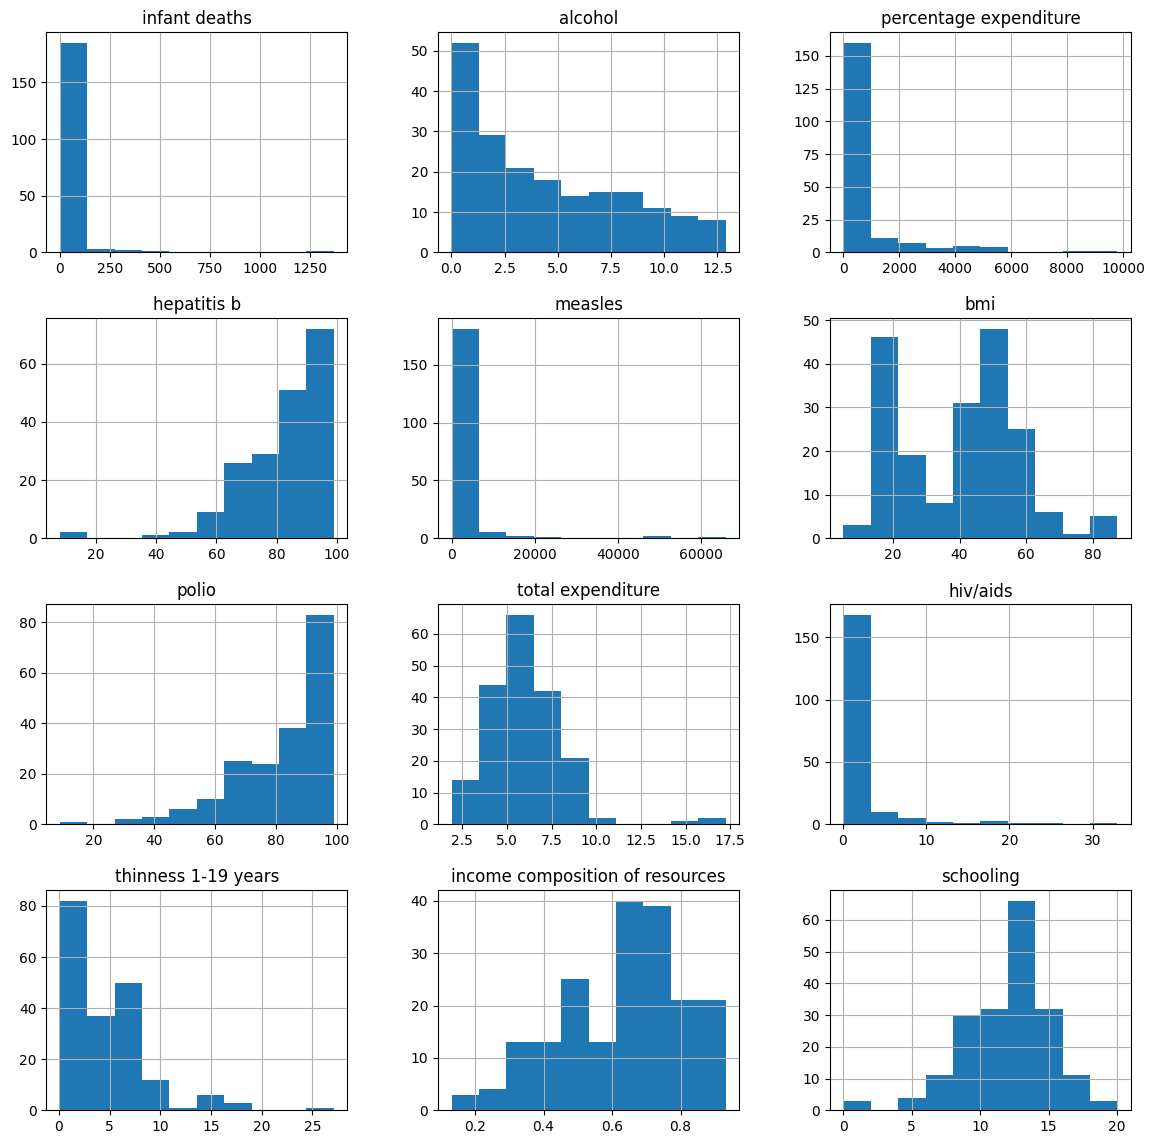

In [329]:
 X1.hist(figsize=(14,14))

In [330]:
std_scaler=StandardScaler().fit(X1_train)   

X1_train_scaled=std_scaler.transform(X1_train)



In [331]:
X1_test_scaled=std_scaler.transform(X1_test)

# Fitting model (Linear Regression, X1, y1)



In [332]:
model1=LinearRegression()    
model1.fit(X1_train_scaled, y1_train)

LinearRegression()

# Feature importance (Linear Regression, X1, y1, w/o Hot Coding)


In [333]:
feature_names1 = X1_train.columns
feature_names1 = list(feature_names1)

In [334]:
df6 = pd.DataFrame(list(zip(feature_names1, model1.coef_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
10,income composition of resources,2.695906
6,polio,2.687550
5,bmi,1.621340
2,percentage expenditure,1.207783
11,schooling,0.974779
7,total expenditure,0.600252
9,thinness 1-19 years,0.180987
4,measles,0.157550
1,alcohol,-0.128151
0,infant deaths,-0.238702


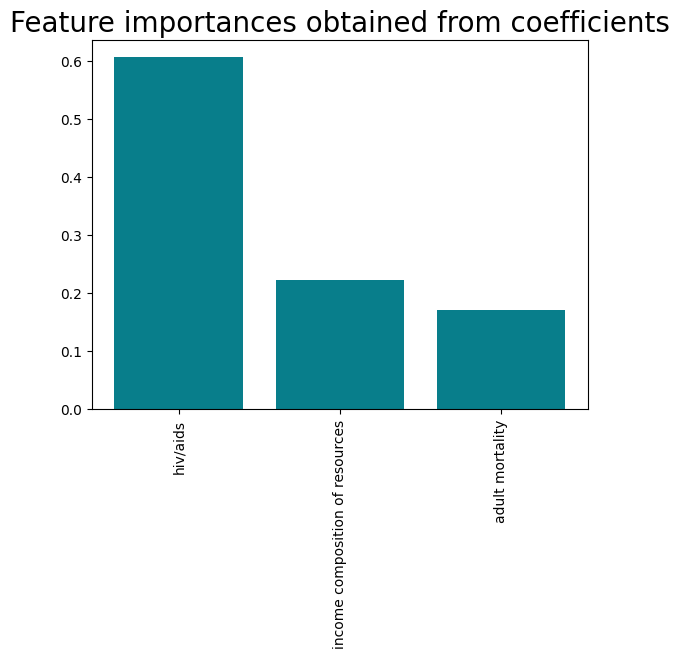

In [594]:
plt.bar(x=df6['columns_name'], height=df6['score_feature_importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Making prediction (X1, y1)

In [335]:
y1_pred=model1.predict(X1_test_scaled)   

y1_pred_train=model1.predict(X1_train_scaled)

# Evaluating model performance (X1, y1)

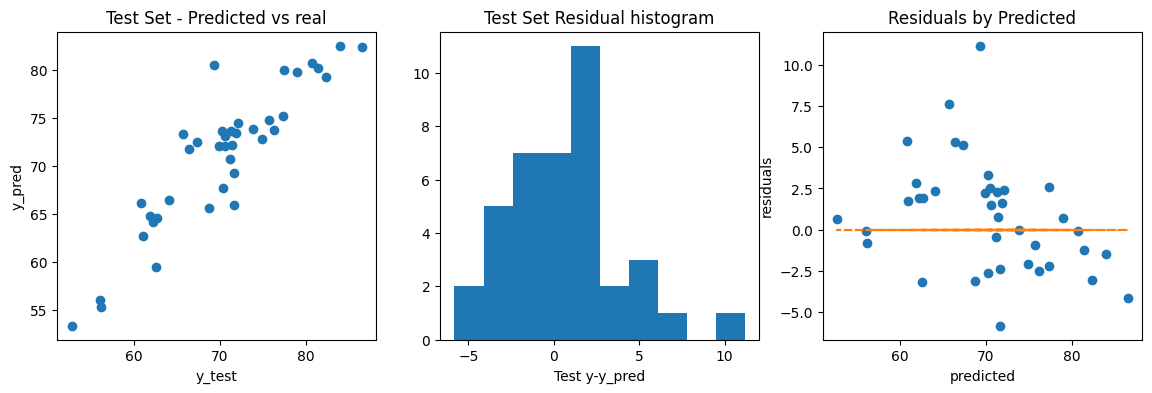

In [336]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y1_pred, y1_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y1_test - y1_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y1_pred,y1_test - y1_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

# Error metrics (X1, y1)

In [337]:
print(mse(y1_test,y1_pred))
print(mae(y1_test,y1_pred))

11.536575546276964
2.6185307031954292


In [338]:
R2_1=r2_score(y1_test,y1_pred)
R2_1

0.7827896927991577

# Cross validation (X1, y1)

In [339]:
scores1=cross_val_score(model1, X1_train_scaled, y1_train, cv = 5)
scores1

array([0.87316099, 0.77831876, 0.78165948, 0.7165332 , 0.84991296])

In [340]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.80 accuracy with a standard deviation of 0.06


# Hot Coding coding categoricals

In [341]:
who_categoricals['status'].unique()

KeyError: 'status'

In [ ]:
len(who_categoricals['status'].unique())

In [ ]:
hc_who_categoricals = pd.get_dummies(who_categoricals[['status']], drop_first=True)
hc_who_categoricals.info()

In [ ]:
hc_who_categoricals['status_Developing'].unique()

# Defining X2, y2 (Linear regression, w/ Hot Coding)

In [ ]:
X2 = who_numericals

In [ ]:
X2

In [ ]:
X2 = pd.concat([X2, hc_who_categoricals], axis=1)

In [ ]:
X2.columns

In [ ]:
X2.drop(['life expectancy'], axis=1, inplace=True) 

In [ ]:
X2

In [ ]:
y2 = who['life expectancy']

# Data splitting (X2, y2)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test, columns=X2.columns)

# Standardizing Data (X2, y2)

In [ ]:
std_scaler=StandardScaler().fit(X2_train)   

X2_train_scaled=std_scaler.transform(X2_train)



In [ ]:
X2_test_scaled=std_scaler.transform(X2_test)

# Fitting model (Linear Regression X2, y2, w/ Hot Coding)



In [ ]:
model2=LinearRegression()    
model2.fit(X2_train_scaled, y2_train)

# Feature importance (Linear Regression, X2, y2, w/ Hot Coding)


In [ ]:
feature_names2 = X2_train.columns
feature_names2 = list(feature_names2)

In [ ]:
df2 = pd.DataFrame(list(zip(feature_names2, model2.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

# Making prediction (X2, y2)

In [ ]:
y2_pred=model2.predict(X2_test_scaled)   

y2_pred_train=model2.predict(X2_train_scaled)

# Evaluating model performance (X2, y2)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y2_pred, y2_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y2_test - y2_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y2_pred,y2_test - y2_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X2, y2)

In [ ]:
print(mse(y2_test,y2_pred))
print(mae(y2_test,y2_pred))

In [ ]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

# Cross validation (X2, y2)

In [ ]:
scores2=cross_val_score(model2, X2_train_scaled, y2_train, cv = 5)
scores2

In [342]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X3, y3 (RFE)

In [343]:
X3 = X2

In [344]:
y3 = y2

# Data splitting (X3, y3)

In [345]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

X3_train = pd.DataFrame(X3_train, columns=X3.columns)
X3_test  = pd.DataFrame(X3_test, columns=X3.columns)

# Recursive Feature Elimination (X3, y3)

In [346]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X3_train, y3_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X3_train.iloc[:,kept_features].columns)

X3_train_RFE = selector.transform(X3_train)
X3_test_RFE  = selector.transform(X3_test)

X3_train_RFE = pd.DataFrame(X3_train_RFE, columns=kept_features)
X3_test_RFE  = pd.DataFrame(X3_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X3_train_RFE)

Final selected features: 


,year,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling,status_Developing
0,2007.0,126.0,0.0,5.28,345.463714,96.0,0.0,25.5,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,1.0
1,2001.0,152.0,0.0,3.81,150.743486,92.0,0.0,22.1,91.0,5.19,9.0,0.8,443716.0,9.4,0.562,11.0,1.0
2,2011.0,143.0,0.0,10.43,0.000000,99.0,0.0,44.5,99.0,7.58,99.0,0.1,1386542.0,4.3,0.733,12.9,1.0
3,2013.0,13.0,3.0,1.29,594.645310,98.0,16.0,59.3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,1.0
4,2002.0,95.0,0.0,0.13,941.703687,99.0,0.0,28.0,99.0,3.40,94.0,0.1,1386542.0,6.7,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2011.0,59.0,0.0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,416268.0,0.8,0.826,14.8,0.0
2346,2010.0,287.0,4.0,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,155588.0,8.0,0.405,8.9,1.0
2347,2007.0,266.0,17.0,6.08,56.778587,92.0,0.0,4.7,62.0,5.56,63.0,2.7,9556889.0,4.2,0.458,8.4,1.0
2348,2003.0,72.0,2.0,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,5731323.0,0.5,0.841,15.4,0.0


# Standardizing Data (X3, y3)

In [347]:
std_scaler=StandardScaler().fit(X3_train_RFE)   

X3_train_scaled=std_scaler.transform(X3_train_RFE)


In [348]:
X3_test_scaled=std_scaler.transform(X3_test_RFE)

# Fitting model (Linear Regression, X3, y3, RFE)

In [349]:
model3=LinearRegression()    
model3.fit(X3_train_scaled, y3_train)

LinearRegression()

# Feature importance (Linear Regression, X3, y3, RFE)


In [350]:
feature_names3 = X3_train.columns
feature_names3 = list(feature_names3)

In [351]:
df2 = pd.DataFrame(list(zip(feature_names3, model3.coef_)))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
15,schooling,2.136879
14,income composition of resources,1.426846
10,diphtheria,1.129300
7,bmi,0.850547
8,polio,0.729888
4,percentage expenditure,0.502258
12,population,0.109341
9,total expenditure,0.069410
3,alcohol,0.050646
0,year,-0.012503


# Making prediction (X3, y3)

In [356]:
y3_pred=model3.predict(X3_test_scaled)   

y3_pred_train=model2.predict(X3_train_scaled)

# Evaluating model performance (X3, y3)

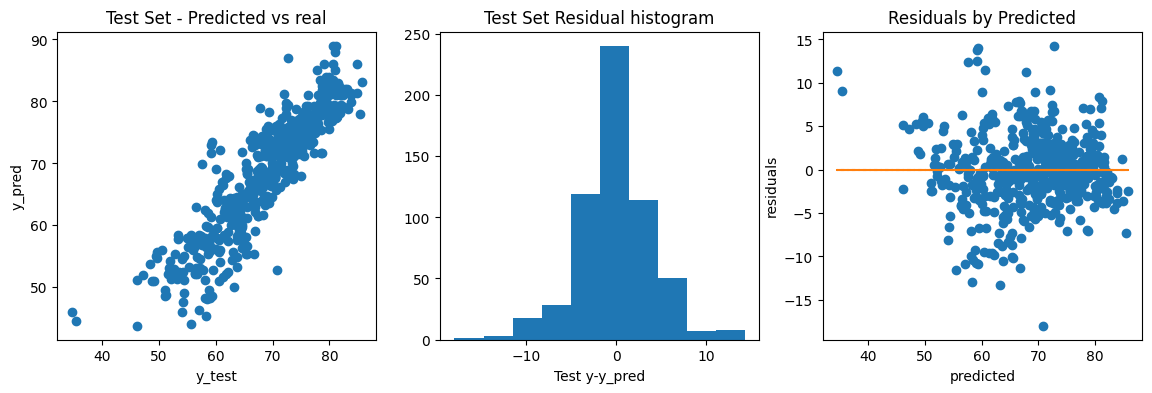

In [357]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y3_pred, y3_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y3_test - y3_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y3_pred,y3_test - y3_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y3_pred,np.zeros(len(y3_pred)),linestyle='dashed')

# Error metrics (X3, y3)

In [358]:
print(mse(y3_test,y3_pred))
print(mae(y3_test,y3_pred))

16.422575702188926
2.958726287564941


In [359]:
R2_3=r2_score(y3_test,y3_pred)
R2_3

0.8105102694145473

# Cross validation (X3, y3)

In [418]:
scores3=cross_val_score(model3, X3_train, y3_train, cv = 5)
scores3

array([0.81225427, 0.82636868, 0.78193953, 0.78345571, 0.80762642])

In [419]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X4, y4 (KNN Regression)

In [420]:
X4 = X3

In [421]:
y4 = y3

# Data splitting (X4, y4)

In [422]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

X4_train = pd.DataFrame(X4_train, columns=X4.columns)
X4_test  = pd.DataFrame(X4_test, columns=X4.columns)

# Recursive Feature Elimination (X3, y3)

In [423]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X4_train, y4_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X4_train.iloc[:,kept_features].columns)

X4_train_RFE = selector.transform(X4_train)
X4_test_RFE  = selector.transform(X4_test)

X4_train_RFE = pd.DataFrame(X4_train_RFE, columns=kept_features)
X4_test_RFE  = pd.DataFrame(X4_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X4_train_RFE)

Final selected features: 


,year,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling,status_Developing
0,2007.0,126.0,0.0,5.28,345.463714,96.0,0.0,25.5,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,1.0
1,2001.0,152.0,0.0,3.81,150.743486,92.0,0.0,22.1,91.0,5.19,9.0,0.8,443716.0,9.4,0.562,11.0,1.0
2,2011.0,143.0,0.0,10.43,0.000000,99.0,0.0,44.5,99.0,7.58,99.0,0.1,1386542.0,4.3,0.733,12.9,1.0
3,2013.0,13.0,3.0,1.29,594.645310,98.0,16.0,59.3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,1.0
4,2002.0,95.0,0.0,0.13,941.703687,99.0,0.0,28.0,99.0,3.40,94.0,0.1,1386542.0,6.7,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2011.0,59.0,0.0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,416268.0,0.8,0.826,14.8,0.0
2346,2010.0,287.0,4.0,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,155588.0,8.0,0.405,8.9,1.0
2347,2007.0,266.0,17.0,6.08,56.778587,92.0,0.0,4.7,62.0,5.56,63.0,2.7,9556889.0,4.2,0.458,8.4,1.0
2348,2003.0,72.0,2.0,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,5731323.0,0.5,0.841,15.4,0.0


# Power transforming data (X4, y4)

In [424]:
trans = PowerTransformer()
trans.fit(X4_train)

PowerTransformer()

In [425]:
X4_train_scaled = trans.transform(X4_train)
X4_test_scaled  = trans.transform(X4_test)

# Fitting model (KNN Regression, X4, y4)

In [426]:
model4 = KNeighborsRegressor(n_neighbors=2)

In [427]:
model4.fit(X4_train_scaled, y4_train)

KNeighborsRegressor(n_neighbors=2)

# Making prediction (X4, y4)

In [428]:
y4_pred_train = model4.predict(X4_train_scaled)
y4_pred  = model4.predict(X4_test_scaled)

# Evaluating model performance (X4, y4)

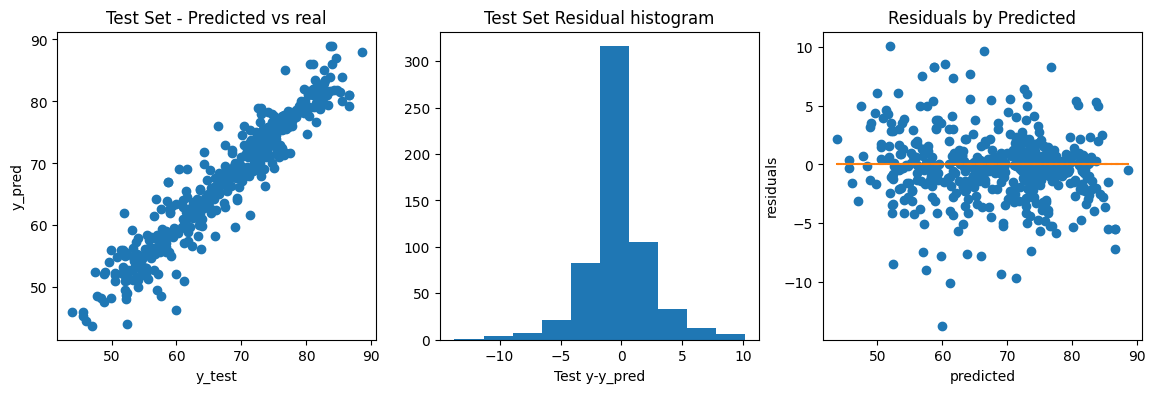

In [429]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y4_pred, y4_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y4_test - y4_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y4_pred,y4_test - y4_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y4_pred,np.zeros(len(y4_pred)),linestyle='dashed')

# Error metrics (X4, y4)

In [430]:
print(mse(y4_test,y4_pred))
print(mae(y4_test,y4_pred))

6.941692176870748
1.7187074829931968


In [431]:
R2_4=r2_score(y4_test,y4_pred)
R2_4

0.9199041974745131

# Cross validation (X4, y4)

In [432]:
scores4=cross_val_score(model4, X4_train_scaled, y4_train, cv = 5)
scores4

array([0.92088415, 0.90030245, 0.89157348, 0.89512581, 0.89108005])

In [433]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))

0.90 accuracy with a standard deviation of 0.01


# Defining X5, y5 (Decision Tress Regression)

In [434]:
X5 = X4

In [435]:
y5 = y4

# Data splitting (X5, y5)

In [436]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.20, random_state=42)

X5_train = pd.DataFrame(X5_train, columns=X5.columns)
X5_test  = pd.DataFrame(X5_test, columns=X5.columns)

# Standardizing Data (X5, y5)

- Not needed because using decision tree

# Fitting model (Decision Tree Regression, X5, y5)

In [437]:
model5 = DecisionTreeRegressor(max_depth=3)

model5.fit(X5_train, y5_train)



DecisionTreeRegressor(max_depth=3)

# Making prediction (X5, y5)

In [438]:
y5_pred_train = model5.predict(X5_train)
y5_pred  = model5.predict(X5_test)

# Evaluating model performance (X5, y5)

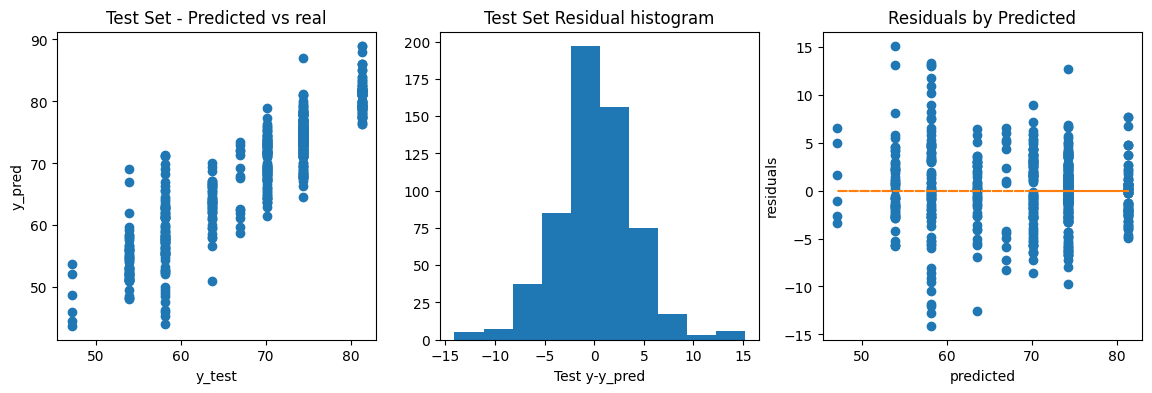

In [439]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y5_pred, y5_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y5_test - y5_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y5_pred,y5_test - y5_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y5_pred,np.zeros(len(y5_pred)),linestyle='dashed')

# Error metrics (X5, y5)

In [440]:
print(mse(y5_test,y5_pred))
print(mae(y5_test,y5_pred))

15.008701598337883
2.90809866543633


In [441]:
R2_5=r2_score(y4_test,y4_pred)
R2_5

0.9199041974745131

# Cross validation (X5, y5)

In [442]:
scores5=cross_val_score(model5, X5_train, y5_train, cv = 5)
scores5

array([0.84226133, 0.85097378, 0.82446537, 0.80517514, 0.7685041 ])

In [443]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

0.82 accuracy with a standard deviation of 0.03


# Defining X6, y6 (Random Forest Regression)

In [444]:
X6 = X5

In [445]:
y6 = y5

# Data splitting (X6, y6)

In [446]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=42)

X6_train = pd.DataFrame(X6_train, columns=X5.columns)
X6_test  = pd.DataFrame(X6_test, columns=X5.columns)

# Standardizing Data (X6, y6)

- Not needed because using decision tree

# Fitting model (Random Forest Regression, X6, y6)

In [447]:
model6 = RandomForestRegressor(n_estimators=100)

model6.fit(X6_train, y6_train)



RandomForestRegressor()

# Feature importance (Random Forest Regression, X6, y6)


In [448]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)

In [449]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
11,hiv/aids,0.592255
14,income composition of resources,0.165326
1,adult mortality,0.142985
7,bmi,0.019824
2,infant deaths,0.013480
13,thinness 1-19 years,0.011717
15,schooling,0.011150
3,alcohol,0.007766
0,year,0.007134
9,total expenditure,0.005714


# Making prediction (X6, y6)

In [450]:
y6_pred_train = model6.predict(X6_train)
y6_pred  = model6.predict(X6_test)

# Evaluating model performance (X6, y6)

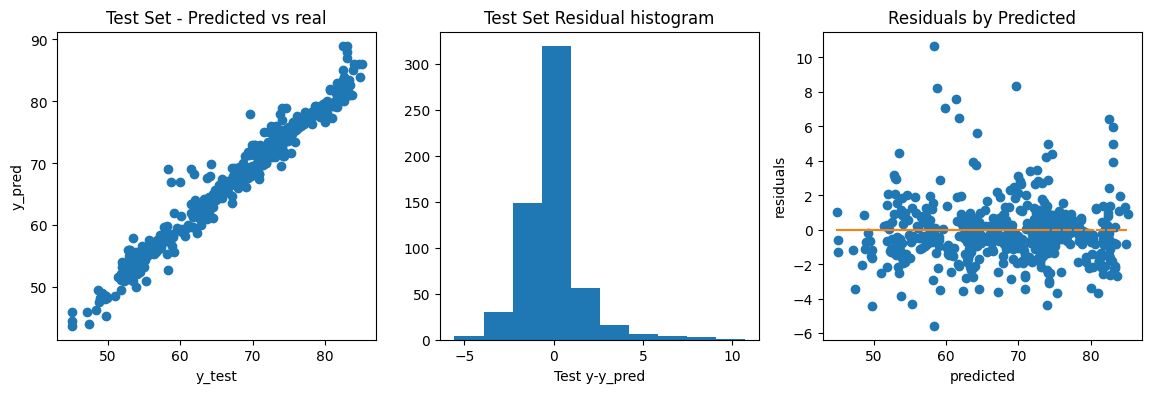

In [451]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y6_pred, y6_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y6_test - y6_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y6_pred,y6_test - y6_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y6_pred,np.zeros(len(y6_pred)),linestyle='dashed')

# Error metrics (X6, y6)

In [452]:
print(mse(y6_test,y6_pred))
print(mae(y6_test,y6_pred))

2.746567314625846
1.09166156462585


In [453]:
R2_6=r2_score(y6_test,y6_pred)
R2_6

0.9683090941444774

# Cross validation (X6, y6)

In [454]:
scores6=cross_val_score(model6, X6_train, y6_train, cv = 10)
scores6

array([0.97150187, 0.9570353 , 0.96803322, 0.96342309, 0.96090005,
       0.95515282, 0.95511877, 0.95475105, 0.9323136 , 0.96282862])

In [455]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores6.mean(), scores6.std()))

0.96 accuracy with a standard deviation of 0.01


In [456]:
feature_names6 = X6_train.columns
feature_names6 = list(feature_names6)


In [457]:
df6 = pd.DataFrame(list(zip(feature_names6, model6.feature_importances_)))
df6.columns = ['columns_name', 'score_feature_importance']
df6.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
11,hiv/aids,0.592255
14,income composition of resources,0.165326
1,adult mortality,0.142985
7,bmi,0.019824
2,infant deaths,0.013480
13,thinness 1-19 years,0.011717
15,schooling,0.011150
3,alcohol,0.007766
0,year,0.007134
9,total expenditure,0.005714


# Defining X7, y7 (Random Forest Regression w/ Feature Selection X6, y6)

In [458]:
X7 = X6[['hiv/aids','income composition of resources','adult mortality']].copy()

In [459]:
X7.isna().any()

hiv/aids                           False
income composition of resources    False
adult mortality                    False
dtype: bool

In [460]:
y7 = y6

# Data splitting (X7, y7)

In [461]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.20, random_state=42)

X7_train = pd.DataFrame(X7_train, columns=X7.columns)
X7_test  = pd.DataFrame(X7_test, columns=X7.columns)

# Fitting model (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)

In [462]:
model7 = RandomForestRegressor(n_estimators=100)

model7.fit(X7_train, y7_train)



RandomForestRegressor()

# Feature importance (Random Forest Regression, X7, y7 w/ Feature Selection X6, y6)


- no need to do feature importance, only using three features from X6, y6

# Making prediction (X7, y7)

In [465]:
y7_pred_train = model7.predict(X7_train)
y7_pred  = model7.predict(X7_test)

# Evaluating model performance (X7, y7)

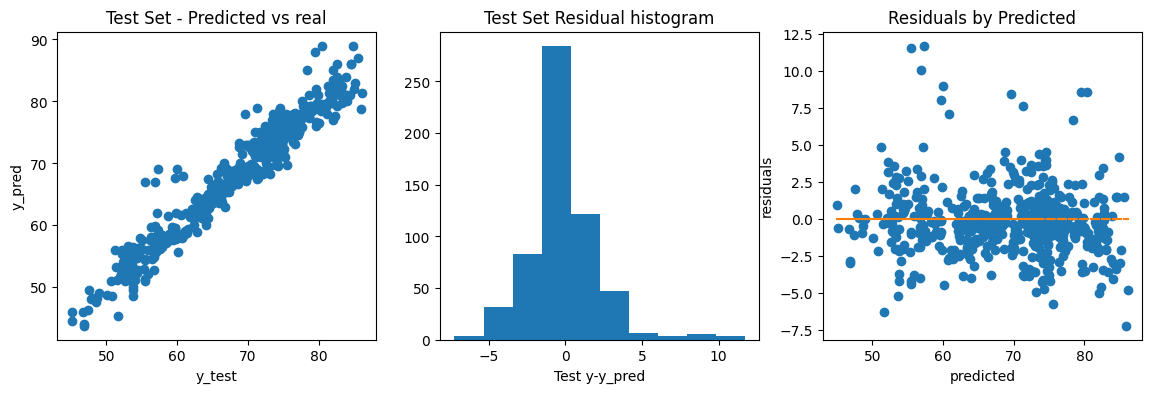

In [466]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y7_pred, y7_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y7_test - y7_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y7_pred,y7_test - y7_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y7_pred,np.zeros(len(y7_pred)),linestyle='dashed')

# Error metrics (X7, y7)

In [467]:
print(mse(y7_test,y7_pred))
print(mae(y7_test,y7_pred))

4.841057148979867
1.5102248414048107


In [468]:
R2_7=r2_score(y7_test,y7_pred)
R2_7

0.9441420985633389

# Cross validation (X7, y7)

In [469]:
scores7=cross_val_score(model7, X7_train, y7_train, cv = 10)
scores7

array([0.95208968, 0.94400988, 0.9546992 , 0.94863753, 0.94553794,
       0.94594373, 0.93587292, 0.94217243, 0.91673345, 0.94607235])

In [470]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores7.mean(), scores7.std()))

0.94 accuracy with a standard deviation of 0.01
